In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"/Weather Data.csv")

In [5]:
##Bring top 5 rows
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [6]:
##shape of the data
df.shape

(8784, 8)

In [7]:
##General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [10]:
##Unique wather values
weather = df['Weather'].unique()
for i in weather:
  print(i)

Fog
Freezing Drizzle,Fog
Mostly Cloudy
Cloudy
Rain
Rain Showers
Mainly Clear
Snow Showers
Snow
Clear
Freezing Rain,Fog
Freezing Rain
Freezing Drizzle
Rain,Snow
Moderate Snow
Freezing Drizzle,Snow
Freezing Rain,Snow Grains
Snow,Blowing Snow
Freezing Fog
Haze
Rain,Fog
Drizzle,Fog
Drizzle
Freezing Drizzle,Haze
Freezing Rain,Haze
Snow,Haze
Snow,Fog
Snow,Ice Pellets
Rain,Haze
Thunderstorms,Rain
Thunderstorms,Rain Showers
Thunderstorms,Heavy Rain Showers
Thunderstorms,Rain Showers,Fog
Thunderstorms
Thunderstorms,Rain,Fog
Thunderstorms,Moderate Rain Showers,Fog
Rain Showers,Fog
Rain Showers,Snow Showers
Snow Pellets
Rain,Snow,Fog
Moderate Rain,Fog
Freezing Rain,Ice Pellets,Fog
Drizzle,Ice Pellets,Fog
Drizzle,Snow
Rain,Ice Pellets
Drizzle,Snow,Fog
Rain,Snow Grains
Rain,Snow,Ice Pellets
Snow Showers,Fog
Moderate Snow,Blowing Snow


In [11]:
##Count number of values
df.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [17]:
##how many nulls we have
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [18]:
##Count weather values
df['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [19]:
##the times the weather is clear
df[df['Weather']=='Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [20]:
##The times Wind Speed km is > 20
df[df['Wind Speed_km/h']>20]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
15,1/1/2012 15:00,1.8,-0.4,85,22,6.4,100.07,Fog
22,1/1/2012 22:00,4.4,1.9,84,24,19.3,99.32,Rain Showers
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [23]:
##rename Weather column
#df = df.rename(columns={"Weather":"Weather condition"})
df.rename(columns={"Weather":"Weather condition"},inplace=True)

In [24]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [30]:
##change the Rel Hum_% name
df.rename(columns={"Rel Hum_%":"Humidity"}, inplace=True)

In [31]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [32]:
##Show all the records where condition is snow
df[df['Weather condition']=='Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [33]:
##How many words contain the word snow
df[df['Weather condition'].str.contains("Snow")]

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [39]:
##Multiple values
df[df['Weather condition'].isin(['Snow Showers','Snow','Fog'])]

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [43]:
##Show all records where wind speed is up to 25 km and visibility < 20
df[(df['Wind Speed_km/h']>25) & (df['Visibility_km']<20)]

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
129,1/6/2012 9:00,-12.5,-16.7,71,26,19.3,100.53,Snow
130,1/6/2012 10:00,-12.3,-16.3,72,28,16.1,100.47,Snow
132,1/6/2012 12:00,-11.7,-15.4,74,28,19.3,100.23,Snow
221,1/10/2012 5:00,0.8,-1.2,86,30,9.7,100.02,"Rain,Snow"
222,1/10/2012 6:00,0.7,-1.2,87,30,8.0,100.04,Snow
...,...,...,...,...,...,...,...,...
8731,12/29/2012 19:00,-9.5,-11.2,87,26,3.2,100.33,"Snow,Fog"
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [44]:
##mean group by Weather condition
df.groupby("Weather condition").mean()

<ipython-input-44-49c9a76ba7ca>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Weather condition").mean()


,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa
Weather condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [45]:
##Min value
df.groupby("Weather condition").min()

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa
Weather condition,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",1/23/2012 20:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/17/2012 15:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",12/18/2012 21:00,0.3,-0.1,92,7,2.4,97.79
Fog,1/1/2012 0:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,1/13/2012 10:00,-9.0,-12.2,78,6,4.8,98.44


In [47]:
##Show all the records were condition is fog
df[df['Weather condition']=='Fog'].head(30)

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog
10,1/1/2012 10:00,-1.0,-2.3,91,9,1.2,101.15,Fog
11,1/1/2012 11:00,-0.5,-2.1,89,7,4.0,100.98,Fog


In [49]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [51]:
##Check wether is clear and humidity is greater than 50 or visibility above 20
df[(df['Weather condition']=='Clear') & (df['Humidity'] > 50 ) | (df['Visibility_km'] > 20)]

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
...,...,...,...,...,...,...,...,...
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy
8763,12/31/2012 3:00,-11.8,-14.4,81,6,25.0,101.42,Mostly Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy


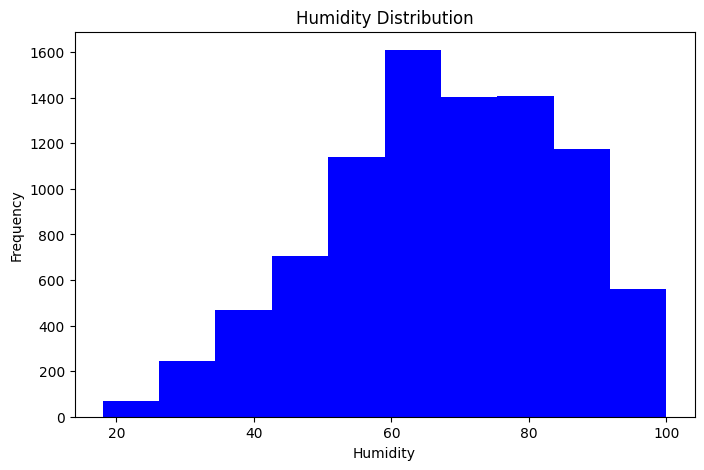

In [60]:
###visualize humidity
plt.figure(figsize=(8,5))
plt.hist(df['Humidity'],bins=10,color='blue')
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.title("Humidity Distribution")
plt.show()

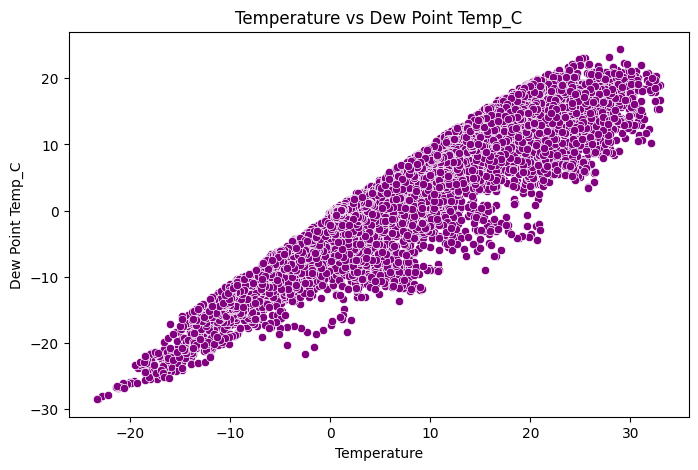

In [67]:
##Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Temp_C',y='Dew Point Temp_C',data=df,color='purple')
plt.xlabel("Temperature")
plt.ylabel('Dew Point Temp_C')
plt.title("Temperature vs Dew Point Temp_C")
plt.show()